# Why are we unable to retain our customers?

- **Saroj Duwal**
- **Date: 07-14-2022**


## Project Goal
- The goal of this project is to identify key drivers of the churn in Telco company, which customers are at risk of churn and make a recommendation for the change in order to retain more customers.
- Build a classification model to predict the customer churn.

## Project Description
The cost of acquiring a new customers can cost five times more than retaining the existing customers. US companies lose $136.8 billion per year due to avoidable consumer switching.The success rate of selling to an existing customer is around 60%-70%, while it is only at around (5-20) % with new customers. Due to these reasons retaining customers is just as important as, if not more important than, acquiring new ones. In this project different attributes(i.e features) of the customers will be analyzed to see if customers will indeed churn or not.Statistical testing will be applied to verify if the features  are correlated and develop a model that performs well on predicting churn based on those features/attributes. A list of customers predicted to churn will be created (via .csv).

## Key Initial Questions
1. #### Does internet service type plays a significant role in cutomer churning?
2. #### Do customers with month to month contract type churn more?
3. #### Does having tech support helps to ratain the customers?
4. #### Does payment type determines how likely customers cancel the service?

## Data Acquisition
### Acquiring telco data from CodeUp SQL database.
- I used the telco_churn from the CodeUP DB server and selected all columns by joining contract_type, payment_type and internet_service_type columns to the customer column

In [6]:
# import the acquire module
import acquire


# shows all the columns
pd.set_option('display.max_columns', None)



In [7]:
# importing get_telco_data function from acquire module

df = acquire.get_telco_data()
df.head(3)

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


## Preparing Data

#### To clean the acquired data, I followed the following cleansing process:
1. Dropped the unwanted columns (Unnamed: 0,contract_type_id,internet_service_type_id,payment_type_id) and checked if there is any null values in the dataframe columns.
2. Converted the column total_charges to float type.
3. Encoded gender,partner,dependents, churn, paperless billing and phone service columns.
4. Created a dummy variables for the columns (multiple_lines, online_security,online backup, device protection, tech support, streaming tv, streaming movies, contract type, internet service type and payment type).
5. concatenated the dummy dataframe to the original dataframe.

In [8]:
# Import prepare module 
import prepare


In [9]:
# importing prep_telco function from prepare module

df= prepare.prep_telco(df)
df.head()



,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


## Splitting the cleaned data to train, validate and test samples

- test_validate_test_split funtion splits the data into three samples i.e train,validate and test
- I used the train sample to explore, fit the modules.
- Validate sample was used validate our model performance during training.
- The test sample was used to provide an unbiased final model performance metric in terms of accuracy,precision etc.


In [11]:
# importing test_validate_test_split function from the prepare module to split the data and set "CHURN" as the target
from prepare import train_validate_test_split

In [12]:
#split the data to train, validate and test
train, validate, test=train_validate_test_split(df, target='churn')
print(train.shape)
print(validate.shape)
print(test.shape)

(4507, 48)
(1127, 48)
(1409, 48)


In [13]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2879,4104-PVRPS,Male,0,Yes,No,24,Yes,No,Yes,No,No,Yes,No,No,No,53.60,1315.35,No,Month-to-month,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6833,9705-ZJBCG,Female,0,Yes,Yes,13,Yes,No,Yes,No,No,Yes,No,No,No,54.15,701.05,No,One year,DSL,Bank transfer (automatic),1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1931,2806-MLNTI,Male,1,Yes,No,52,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,105.10,5376.40,No,One year,Fiber optic,Bank transfer (automatic),0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0
4784,6728-WYQBC,Male,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.95,20.95,No,Month-to-month,None,Bank transfer (automatic),0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0
1658,2408-TZMJL,Male,0,Yes,No,59,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,110.15,6448.05,Yes,One year,Fiber optic,Electronic check,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0


# Exploratory Analysis

In [14]:
#Import all the libraries needed for the exploration part including statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

### Question 1
- Does internet service type plays a significant role in cutomer churning?


<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

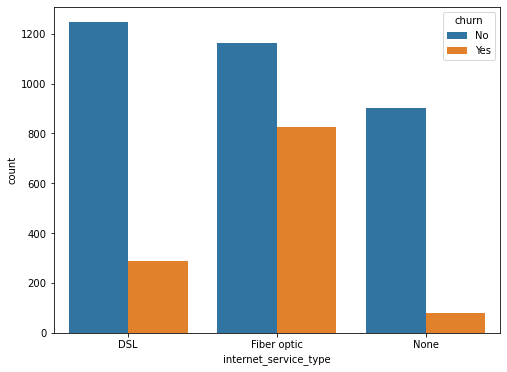

In [15]:
plt.figure(figsize=(8,6))

sns.countplot(data=train, x='internet_service_type',hue='churn')

<function matplotlib.pyplot.show(close=None, block=None)>

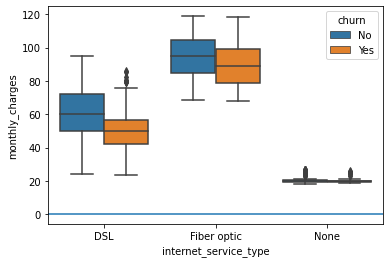

In [16]:
# comparing monthly charges based on internet service type.
sns.boxplot(x='internet_service_type',y='monthly_charges',data= train, hue='churn')
mean_churn_rate = train.churn_encoded.mean()
plt.axhline(mean_churn_rate)
plt.show

#### Statistical testing:
The objective of chi square test is to analyze the relationship of the categorical features(internet service type) with the target variable"CHURN'.
- I set my confidence level to 95%
- α=(1-0.95)= 0.05
###### Null Hypothesis: 
- $H_0$ :Both features (INTERNET SERVICE TYPE and CHURN ) are independent of each other
##### Alternative Hypothesis:
-  $H_a$ : There is an association between the two categorical features

In [17]:
α=0.05
observed =pd.crosstab(train.churn, train.internet_service_type)
observed

internet_service_type,DSL,Fiber optic,None
churn,,,
No,1246,1164,901
Yes,290,825,81


In [18]:
# chi square test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected

(442.4390844784729,
 8.425069969473643e-97,
 2,
 array([[1128.39937874, 1461.18903927,  721.41158198],
        [ 407.60062126,  527.81096073,  260.58841802]]))

In [19]:
if p< α:
    print('Since  p< α, these two categorical variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two categorical varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two categorical variables are dependent to eachother.
Null Hypothesis rejected


#### Answer to question 1
- ###### Customers with Fiber Optic Internet Service is more likely to churn than the other two types as the monthly charges with fiber optic internet service is significantly higher.

### Question 2
- Do customers with month to month contract type churn more?




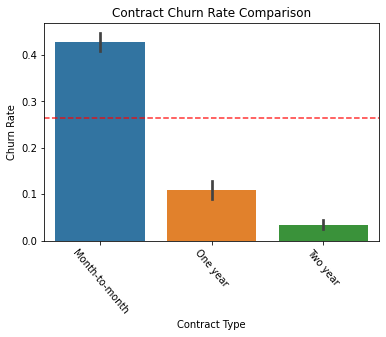

In [20]:
churn_rate = train['churn_encoded'].mean()
fig = sns.barplot(x="contract_type", y='churn_encoded', data=train)
fig.set(ylabel='Churn Rate', xlabel= 'Contract Type', title= 'Contract Churn Rate Comparison')
plt.axhline(churn_rate, ls='--', label= 'Average Churn Rate', alpha = 0.8, color='red')
plt.xticks(rotation=-50)
plt.show()

The objective of chi sqaure test is to analyze the relationship of the categorical features(contract_type) with the target variable"CHURN'.
- α=0.05
##### Null Hypothesis:
- $H_0$ :Both features (CONTRACT TYPE and CHURN ) are independent of each other
##### Alternative Hypothesis:
- $H_a$ : There is an association between the two categorical features

In [21]:
α=0.05
observed =pd.crosstab(train.churn, train.contract_type)
observed

contract_type,Month-to-month,One year,Two year
churn,,,
No,1411,867,1033
Yes,1055,105,36


In [22]:

# chi square test 
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected


(751.6258020700722,
 6.116892560285463e-164,
 2,
 array([[1811.60994009,  714.06523186,  785.32482805],
        [ 654.39005991,  257.93476814,  283.67517195]]))

In [23]:
if p< α:
    print('Since  p< α, these two categorical variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two categorical varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two categorical variables are dependent to eachother.
Null Hypothesis rejected


#### Answer to question 2
-  Contract type has significant role in determining whether the customers churn or not.

### Question 3
- #### Does having tech support prevents customers from churning?


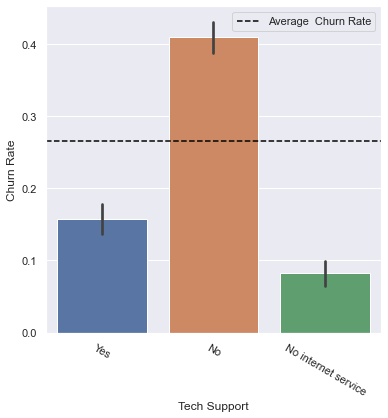

In [27]:
plt.figure(figsize=(6,6))
churn_rate = train['churn_encoded'].mean()
sns.set(style="darkgrid")
sns.color_palette("dark:salmon_r", as_cmap=True)
fig = sns.barplot(x="tech_support", y="churn_encoded", data=train)
fig.set(ylabel = 'Churn Rate', xlabel= 'Tech Support')
plt.axhline(churn_rate, ls='--', label = "Average  Churn Rate", color='black')
plt.legend()
plt.xticks(rotation=-30)
plt.show()

### Statistical testing for tech support and churn

The objective of chi sqaure test is to analyze the relationship of the categorical features(Tech Support) with the target variable"CHURN'.
- α=0.05
##### Null Hypothesis:
- $H_0$ :Both features (Tech Support and CHURN ) are independent of each other
##### Alternative Hypothesis:
- $H_a$ : There is an association between the two categorical featurestatistical testing for 'tech support' and 'churn'

In [28]:
α=0.05
observed =pd.crosstab(train.churn, train.tech_support)
observed

tech_support,No,No internet service,Yes
churn,,,
No,1312,901,1098
Yes,909,81,206


In [29]:
# chi square test 
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(481.5618235365806,
 2.6926423455647452e-105,
 2,
 array([[1631.6243621 ,  721.41158198,  957.96405591],
        [ 589.3756379 ,  260.58841802,  346.03594409]]))

In [30]:
if p< α:
    print('Since  p< α, these two categorical variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two categorical varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two categorical variables are dependent to eachother.
Null Hypothesis rejected


#### Takeaways from question 3
-  Customers with no tech support are to more likely to churn.
- Statistical testing shows that tech support and churn are related.

### Question 4
- Does payment type determines how likely customers cancel the service?

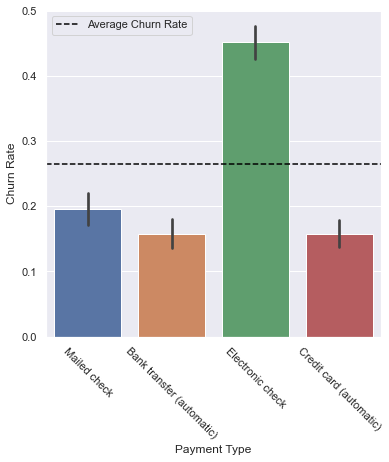

In [34]:
# plot the  payment type and churn rate
plt.figure(figsize=(6,6))
churn_rate = train['churn_encoded'].mean()

fig = sns.barplot(x="payment_type", y="churn_encoded", data=train)
fig.set(ylabel = 'Churn Rate', xlabel= 'Payment Type')
# plt.xlabel('Payment Type') 
plt.axhline(churn_rate, ls='--', label = "Average Churn Rate", color='black')
plt.legend()
plt.xticks(rotation=-45)
plt.show()

 #### Statistical testing for churn and payment type
- α=0.05
###### Null Hypothesis: 
- $H_0$ :Both features (PAYMENT TYPE and CHURN ) are independent of each other
##### Alternative Hypothesis:
-  $H_a$ : There is an association between the two categorical features

In [36]:
α=0.05
observed =pd.crosstab(train.churn, train.payment_type)
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,841,824,828,818
Yes,158,154,685,199


In [37]:
# chi square test 
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected



(415.13906974120556,
 1.1635248095297359e-89,
 3,
 array([[ 733.90037719,  718.47304193, 1111.50277346,  747.12380741],
        [ 265.09962281,  259.52695807,  401.49722654,  269.87619259]]))

In [38]:
if p< α:
    print('Since  p< α, these two categorical variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two categorical varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two categorical variables are dependent to eachother.
Null Hypothesis rejected


#### Takeaways from Question 4
- Payment type has also significant role in customers churning.
- From the exploration it was found that customers with electronic check payment meathod has a higher churn rate
- Average churn rate was 26% while churn rate for electronic check was at around 45%

## Question 5
- ## What role does tenure and monthly charges play on customers churning?

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

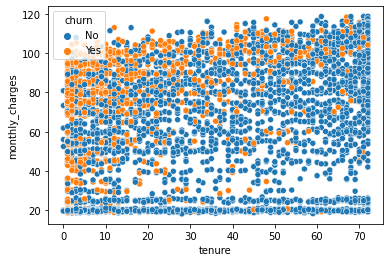

In [27]:
# used a scatterplot to visualize the tenure and monthly charges to see the behaviour of churn.
sns.scatterplot(x='tenure', y='monthly_charges', hue='churn' ,data= train)

α= 0.05
- $H_0$:tenure and monthly charges are not linearly correlated
- $H_a$: tenure and monthly charges are linearly correlated

In [60]:
α= 0.05
# Use correlation testing(pearsonr).
corr, p = stats.pearsonr(train.tenure, train.monthly_charges)

if p < α:
    print("We reject the null hypothesis.\nBoth variables are linearly correlated")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis.
Both variables are linearly correlated


(0.24540138292549024, 8.381047831007838e-63)

- From the statisticl testing and visualization it is clear that customer churning is well influenced by monthly charges and tenure. Higher the monthly charge and shorter the tenure, customers are more likely to churn.

### From the exploration it was found that all the attributes explored above are dependent to churn and ststistical tetsing shows that these features have direct influence on customers churning.
 #### features explored
    1.Internet Service Type 
    2.PaymentType 
    3.Tech Support 
    4.Contract Type 
    5.Monthly Charges and Tenure




# Predicting Churn
- Classification machine learning was used to fit the training data as our target variable is yes/no value. Three different model were created and best model with high accuracy was used to test the test sample. The best model with high accuracy will be picked.
- I used the Accuracy metrics as it describes how often the classifier is predicting correctly overall.On this telco data set predicting where the customer churn or not correctly is of equal importance. As we are not given a specific context of which one is expensive in predicting falsely or expensive to missing a positive instances.


### Baseline
- Since '0' has highere value counts, I set the baseline prediction to be No.i.e churn_encoded == 0

In [30]:
#find the unique value counts in train sample. 
train.churn_encoded.value_counts()

0    3311
1    1196
Name: churn_encoded, dtype: int64

In [31]:
# baseline accuracy for train set
train['baseline']= 0
train.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,baseline
2879,4104-PVRPS,Male,0,Yes,No,24,Yes,No,Yes,No,No,Yes,No,No,No,53.60,1315.35,No,Month-to-month,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6833,9705-ZJBCG,Female,0,Yes,Yes,13,Yes,No,Yes,No,No,Yes,No,No,No,54.15,701.05,No,One year,DSL,Bank transfer (automatic),1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1931,2806-MLNTI,Male,1,Yes,No,52,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,105.10,5376.40,No,One year,Fiber optic,Bank transfer (automatic),0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0


In [32]:
baseline_accuracy=(train.churn_encoded == train.baseline).mean()
print(f'The baselline Accuracy for Train data ={baseline_accuracy:.2%}')

The baselline Accuracy for Train data =73.46%






# Fit the Train Data into 3 different models
- I will be using following three diffrent models to compare
1. #### Decision Tree
2. #### Random Forest
3. #### Logistic Regression

In [33]:
# assign the train, validate and test sample with the features I wanted to use

X_train= train[['monthly_charges','contract_type_Two year','contract_type_One year','internet_service_type_Fiber optic','internet_service_type_None',
               'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check','tech_support_Yes','tenure','partner_encoded','dependents_encoded']]
y_train = train['churn_encoded']


X_validate= validate[['monthly_charges','contract_type_Two year','contract_type_One year','internet_service_type_Fiber optic','internet_service_type_None',
               'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check','tech_support_Yes','tenure','partner_encoded','dependents_encoded']]
y_validate = validate['churn_encoded']


X_test= test[['monthly_charges','contract_type_Two year','contract_type_One year','internet_service_type_Fiber optic','internet_service_type_None',
               'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check','tech_support_Yes','tenure','partner_encoded','dependents_encoded']]
y_test = test['churn_encoded']

In [34]:
# checking to see the dataframe has only the features that I want to use.
X_train.head(3)

,monthly_charges,contract_type_Two year,contract_type_One year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tech_support_Yes,tenure,partner_encoded,dependents_encoded
2879,53.60,0,0,0,0,0,0,1,1,24,1,0
6833,54.15,0,1,0,0,0,0,0,1,13,1,1
1931,105.10,0,1,1,0,0,0,0,0,52,1,0


In [35]:
print(X_train.shape,X_validate.shape, X_test.shape)

(4507, 12) (1127, 12) (1409, 12)


## Examining the data with Decision Tree

In [38]:
#import decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [39]:
# Make the model named as tree1 and tree 2
tree1 = DecisionTreeClassifier(max_depth=6, random_state=123)


In [40]:
# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

#Fit the model validate set
tree2= tree1.fit(X_validate,y_validate)


In [41]:
# Use the model and  evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

# Model to predict performance on validation set
y_predictions1= tree2.predict(X_validate)

In [42]:

print('Classification Report for Train Data:')
# print the classification report in the form of dataframe.
reportDT=classification_report(y_train, y_predictions, output_dict=True)
pd.DataFrame(reportDT).T



Classification Report for Train Data:


,precision,recall,f1-score,support
0,0.799279,0.936877,0.862625,3311.000000
1,0.666134,0.348662,0.457739,1196.000000
accuracy,0.780785,0.780785,0.780785,0.780785
macro avg,0.732706,0.642770,0.660182,4507.000000
weighted avg,0.763947,0.780785,0.755182,4507.000000


In [43]:
print('Classification report for Validate Data set:')
# print the classification report in the form of dataframe.
report=classification_report(y_validate, y_predictions1, output_dict=True)
pd.DataFrame(report).T



Classification report for Validate Data set:


,precision,recall,f1-score,support
0,0.836991,0.967391,0.897479,828.000000
1,0.841176,0.478261,0.609808,299.000000
accuracy,0.837622,0.837622,0.837622,0.837622
macro avg,0.839084,0.722826,0.753644,1127.000000
weighted avg,0.838101,0.837622,0.821158,1127.000000


## Examining data with Random Forrest 

In [44]:
#Import random forest classifier fromsklearn library
from sklearn.ensemble import RandomForestClassifier



In [45]:
# make the model 'forest1' by using random forrest
forest = RandomForestClassifier(max_depth=6, random_state=123)

#fit the model on train data and validate data
forest1=forest.fit(X_train,y_train)
forest2=forest.fit(X_validate, y_validate)


# Use the model to predict
y_predictions = forest1.predict(X_train)
y_predictions2= forest2.predict(X_validate)

# print out classification report and accuracy
print('Classification report for Train data:')
reportRF= (classification_report(y_train,y_predictions,output_dict=True))
pd.DataFrame(reportRF).T



Classification report for Train data:


,precision,recall,f1-score,support
0,0.818035,0.915131,0.863863,3311.000000
1,0.650062,0.436455,0.522261,1196.000000
accuracy,0.788107,0.788107,0.788107,0.788107
macro avg,0.734048,0.675793,0.693062,4507.000000
weighted avg,0.773461,0.788107,0.773214,4507.000000


In [46]:
print('Classification report for Validate data')
report=(classification_report(y_validate, y_predictions2, output_dict= True))
pd.DataFrame(report).T



Classification report for Validate data


,precision,recall,f1-score,support
0,0.846238,0.937198,0.889398,828.000000
1,0.752381,0.528428,0.620825,299.000000
accuracy,0.828749,0.828749,0.828749,0.828749
macro avg,0.799309,0.732813,0.755112,1127.000000
weighted avg,0.821337,0.828749,0.818144,1127.000000


Text(0.5, 1.0, 'Top Features derived by Random Forest')

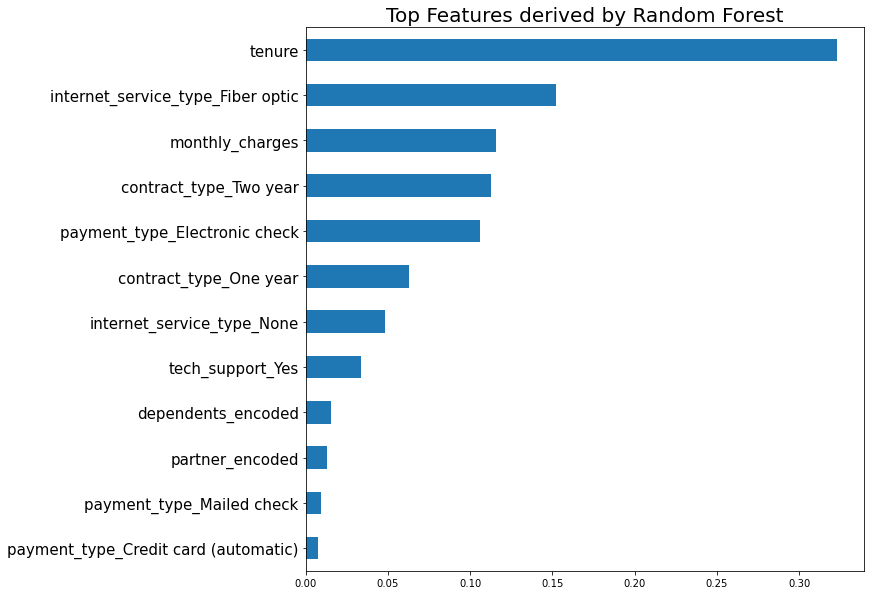

In [54]:
# After comparing three different models I found random forest perform better .

## to look for top features using random forest

rf=RandomForestClassifier(max_depth=6, random_state=123)
model=rf.fit(X_train,y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(47)  
   .plot(kind='barh', figsize=[10,10])
    .invert_yaxis())
plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)


### Examining train data with Linear Regression

In [48]:
# Import Logistic regression from sklearn library
from sklearn.linear_model import LogisticRegression

In [49]:
# make the model 'logit' by using logistic regresssion
logit = LogisticRegression(C=1,random_state=123)

#fit the model on train data and validate data
logit1=logit.fit(X_train,y_train)
logit2= logit.fit(X_validate,y_validate)

# Use the model to predict
y_predictions = logit1.predict(X_train)
y_predictions3= logit2.predict(X_validate)

# print out classification report and accuracy
reportLR= (classification_report(y_train,y_predictions,output_dict=True))
pd.DataFrame(reportLR).T



,precision,recall,f1-score,support
0,0.829757,0.887647,0.857727,3311.00000
1,0.614508,0.495819,0.548820,1196.00000
accuracy,0.783670,0.783670,0.783670,0.78367
macro avg,0.722132,0.691733,0.703273,4507.00000
weighted avg,0.772638,0.783670,0.775754,4507.00000


In [50]:
report= (classification_report(y_validate,y_predictions3,output_dict=True))
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.836735,0.891304,0.863158,828.000000
1,0.632653,0.518395,0.569853,299.000000
accuracy,0.792369,0.792369,0.792369,0.792369
macro avg,0.734694,0.704849,0.716505,1127.000000
weighted avg,0.782591,0.792369,0.785342,1127.000000


In [51]:
# Accuracy of the three different models:
print('Accuracy based on Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))
print('Accuracy based on Decision Tree classifier on validate set: {:.2f}'
      .format(tree2.score(X_validate, y_validate)))
print('----------------------')
print('Accuracy based on Random Forest classifier on training set: {:.2f}'
      .format(forest1.score(X_train, y_train)))
print('Accuracy based on Random Forest classifier on validate set: {:.2f}'
      .format(forest2.score(X_validate, y_validate)))
print('----------------------')
print('Accuracy based on Logistic Regression classifier on training set: {:.2f}'
      .format(logit1.score(X_train, y_train)))
print('Accuracy based on Logistic Regression classifier on validate set: {:.2f}'
      .format(logit2.score(X_validate, y_validate)))

Accuracy based on Decision Tree classifier on training set: 0.78
Accuracy based on Decision Tree classifier on validate set: 0.84
----------------------
Accuracy based on Random Forest classifier on training set: 0.79
Accuracy based on Random Forest classifier on validate set: 0.83
----------------------
Accuracy based on Logistic Regression classifier on training set: 0.78
Accuracy based on Logistic Regression classifier on validate set: 0.79


- ## The accuracy are predicted roughly the same in all three models.However, Random Forest has model has 79% accuracy on train data and 83% on validate data. So I chose the Random forest model to proceed to next phase.

In [52]:
# fit the test data set on random forest classifier
forest3=forest.fit(X_test, y_test)
y_pred = forest3.predict(X_test)

# print out classification report and accuracy
print('Accuracy based on Random Forest classifier on Test set: {:.2f}'
      .format(forest2.score(X_test, y_test)))
print('Classification report for Test data:')
report= (classification_report(y_test,y_pred,output_dict=True))
pd.DataFrame(report).T





Accuracy based on Random Forest classifier on Test set: 0.84
Classification report for Test data:


,precision,recall,f1-score,support
0,0.862534,0.927536,0.893855,1035.000000
1,0.746622,0.590909,0.659701,374.000000
accuracy,0.838183,0.838183,0.838183,0.838183
macro avg,0.804578,0.759223,0.776778,1409.000000
weighted avg,0.831766,0.838183,0.831702,1409.000000



- ##### Baseline accuracy = 73.46%
- ##### Train Accuracy = 79%
- ##### Validate Accuracy = 83%
- ##### Test Accuracy = 84%

### Comparing all the accuracies, it is clear that the model I chose performed well above the baseline and indicates that the features I used for modeling are signnificant drivers of the outcome.
- ##### I expect the model to perform 84% accurately in the future data that it has not seen under the condition that there has been no major changes in the datasource.

### Creating a CSV for the Random Forest Model predictions on original dataframe

In [53]:

df1= df
df1.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [55]:
df1= df
telco_prediction= df1[['monthly_charges','contract_type_Two year','contract_type_One year','internet_service_type_Fiber optic','internet_service_type_None',
               'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check','tech_support_Yes','tenure','partner_encoded','dependents_encoded']]
telco_prediction.head()

probability= forest.predict_proba(telco_prediction)
probability= pd.DataFrame(probability,columns=['No_Churn','Churn'])

prediction= forest.predict(telco_prediction)
prediction= pd.DataFrame(prediction)

customer_id= df1['customer_id']
customer_id= pd.DataFrame(customer_id).reset_index(drop=True)

customer_id['predictions']=forest.predict(telco_prediction)

customer_id['churn_prob']= probability['Churn']
customer_id.to_csv(r'Telco_Predictions.csv', index= False)


# CONCLUSION:


#### The Machine learning model is expected to perform 84% accurately on any future unseen data.
#### The variables with the highest correlation to whetherThere appears to be some notable features that leads to churn more than  the average industry churn rate. They include customers:
1. Who uses the FiberOptic Internet service.
2. Who pays bill via electronic check
3. Who are on month to month contracts
4. Who doesnot have tech support feature on their plan.





### Recommendations
- There are a number of features with subsets that churn at a higher rate than the average rate. This poses a number of questions that warrant further research. Such features include things like streaming services, online security etc.
- Offer more discounts for customers who decide to choose one yearor two year contract.
- Adjust the competitive rate for the fiber optic internet service since most customers with this service pays more in average and ends up cancelling the service.
- There seems to be an issue with the electronic check payment type. In this case Autopay should be highly encouraged by giving some discounts for enrolling to autopay service.
- In regards to tech support, a separate research should be carried out to further analyze the underlying technical issues that needs the support.

## Next Steps
- More features from dataset that are correalated to other features aside from our target variable, should be explored in order to make the model perfom even better. Studying correlation between multiple variables would further help pinning down the driver for the churn. 